# Predictive Modeling Example

## Step 1: Import a number of libraries that we expect to use

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(1) # set this to ensure the results are repeatable. 

## Step 2:  Define a hidden linear relationship/model

First let's define our relationship (normally, this is hidden, but since we are creating the data, we will need to identify this)

In [2]:
b1 = 30.5 # slope for x
b0 = 20   # y intercept

## Step 3: Create input and output data using the model

Let's set the number of observations that we will synthesize...

In [3]:
sample_size = 180

We need to create a set of X (input) values. We could simply create a linear sequence...

In [4]:
# create sample_size number of x values between 0 and 100
X = np.linspace(0, 100, sample_size)

OR, to better similate 'real world' data, let's select 1000 

In [5]:
x_mean = 0
x_stdev = 10
X = np.round(np.random.normal(x_mean, x_stdev, sample_size),2)

Once we have the X values (input), we can generate y values using our 'hidden' model...

In [6]:
y = b0 + b1 * X 

But, this is rather boring data to analyze, because the 'hidden' model is not really hidden at all...

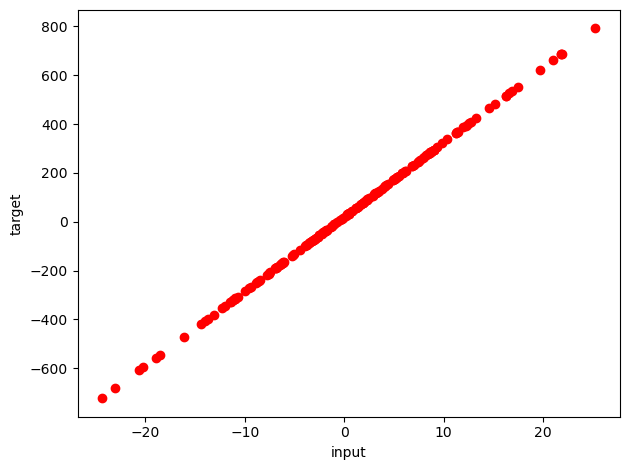

In [7]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')

ax.set_xlabel('input')
ax.set_ylabel('target')
plt.tight_layout()
plt.show()

## Step 4: Add some random noise to 'hide' the model

Now, let's obscure the model by adding noise to the data by adding errors that are randomly selected from a norma distribution

In [8]:
e_mean = 0
e_stdev = 100
e = np.round(np.random.normal(e_mean, e_stdev, sample_size), 2) # round to two decimal places
y = y + e

## Step 5: Explore the resulting synthesized data

Now, let's look at a scatter plot of both the X and y data with the noise added in...

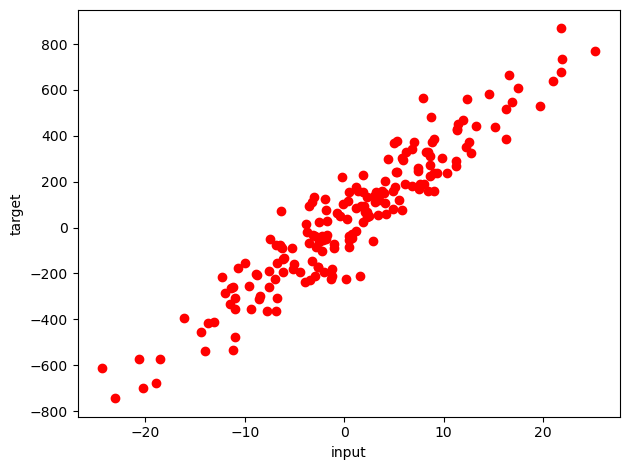

In [9]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')

ax.set_xlabel('input')
ax.set_ylabel('target')
plt.tight_layout()
plt.show()

### Step 6: Create a pandas data frame from the data

Since our goal is to generate data that we can analyze with another notebook (for practice), let's save this data to a csv. 

First we will create a dataframe with the data we just similated...

In [10]:
df = pd.DataFrame({'input': X, 'target': y})
df.head(3)

,input,target
0,16.24,388.06
1,-6.12,-135.31
2,-5.28,-90.72


## Step 7: Save the data frame contents to a csv

Lastly, let's save the data we created to a csv file. This saved data will be used to practice finding hidden relationships in data.

In [11]:
df.to_csv('Sample_c02_dataset_1.csv', index=False)

# MODEL FITTING

## Step 1: Import the libraries we will use in this notebook

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

np.random.seed(1) # set this to ensure the results are repeatable. 

## Step 2: Load the given data that we will model

In [13]:
df = pd.read_csv('Sample_c02_dataset_1.csv')

df.head(3)

,input,target
0,16.24,388.06
1,-6.12,-135.31
2,-5.28,-90.72


In [14]:
X=df[['input']]
y=df[['target']]

## Step 3: Explore the given data

Often we will do much more than this, but at least look at things using a scatterplot

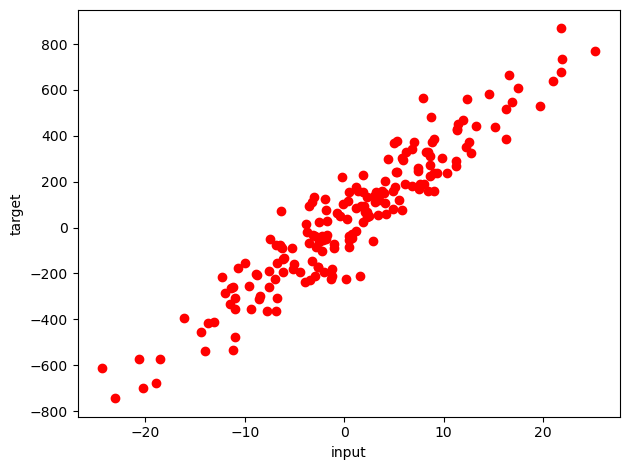

In [15]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')

ax.set_xlabel('input')
ax.set_ylabel('target')
plt.tight_layout()
plt.show()

## Step 4: Fit the model

Fit the linear regression model to the dataset

In [16]:
lin_reg=LinearRegression()
_ = lin_reg.fit(X,y) # note the underscore. This is a convention to indicate that the output is not used.


# OR, we could combine the two lines above to one as follows...
#lin_reg = LinearRegression().fit(X,y)

## Step 5: Analyze the linear regression model's performance

Visualize the linear regression model results

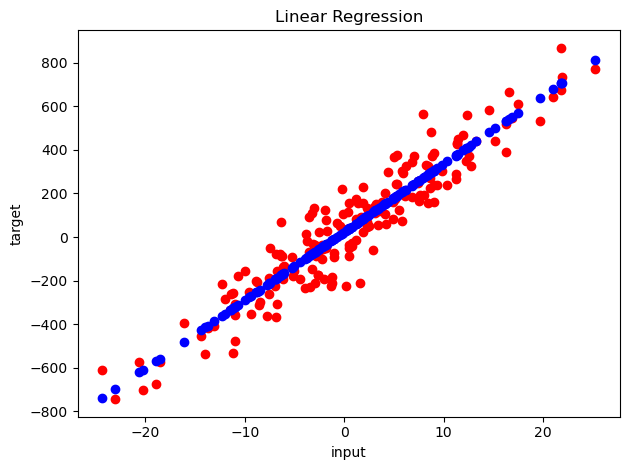

In [17]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')
ax.scatter(X, lin_reg.predict(X), color='blue')

ax.set_title('Linear Regression')
ax.set_xlabel('input')
ax.set_ylabel('target')
plt.tight_layout()
plt.show()

In [18]:
b0 = lin_reg.intercept_[0]
b1 = lin_reg.coef_[0][0]
r2 = lin_reg.score(X, y)

... using fstring formatting, we can display these values as follows...

In [19]:
print(f"Y = {b0:.2f} + {b1:.2f}x")
print(f"R^2: {lin_reg.score(X, y):.3f}") 
# for more on fstrings see here...
# https://www.freecodecamp.org/news/python-f-strings-tutorial-how-to-use-f-strings-for-string-formatting/

Y = 23.34 + 31.27x
R^2: 0.891


## Summarize

When we decrease the sample size, the overall fit of the regression model to the data may be reduced and the model may have less precision in predicting the values of the dependent variable. This can lead to less accurate predictions in the results and even though there is increase in the R-squared value, the result is derived from lower sample size which may lead not to reject the false null hypothesis.